In [31]:
import numpy as np
import pandas as pd
import os
import shutil
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score, roc_auc_score

from sklearn.metrics import confusion_matrix

%matplotlib inline

In [26]:
filename = 'homework.zip'

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('')
print(f'zipfile {filename} extracted')

df_list = []

for dir_name in os.listdir('data'):
    if not os.path.isdir(f'data/{dir_name}'):
        continue
    else:
        print(f'Working with dir: {dir_name}')
        for file_name in os.listdir(f'data/{dir_name}'):
            if file_name.endswith('.csv'):
                df_csv = pd.read_csv(f'data/{dir_name}/{file_name}')
                df_csv['action'] = dir_name
                df_list.append(df_csv)
        shutil.rmtree(f'data/{dir_name}')

os.rmdir('data')
df = pd.concat(df_list, ignore_index=True)
df.to_csv('df.csv', index=False)
print('df created and saved to df.csv')
df

zipfile homework.zip extracted
Working with dir: idle
Working with dir: running
Working with dir: walking
Working with dir: stairs
df created and saved to df.csv


,accelerometer_X,accelerometer_Y,accelerometer_Z,action
0,-0.435745,5.837064,9.792285,idle
1,0.239420,5.669470,8.020576,idle
2,0.407014,5.276821,8.025364,idle
3,-0.057461,5.506664,8.149863,idle
4,0.679953,6.057330,8.264784,idle
...,...,...,...,...
193855,-1.948880,-3.064578,-2.513912,stairs
193856,1.225831,-5.554548,-2.317587,stairs
193857,0.210690,-10.802638,-1.599327,stairs
193858,2.738967,-8.657434,4.031836,stairs


In [51]:
df.shape

(193860, 4)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193860 entries, 0 to 193859
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  193860 non-null  float64
 1   accelerometer_Y  193860 non-null  float64
 2   accelerometer_Z  193860 non-null  float64
 3   action           193860 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 5.9 MB


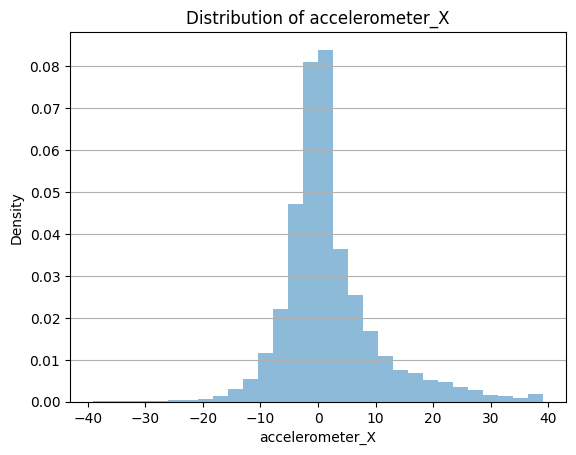

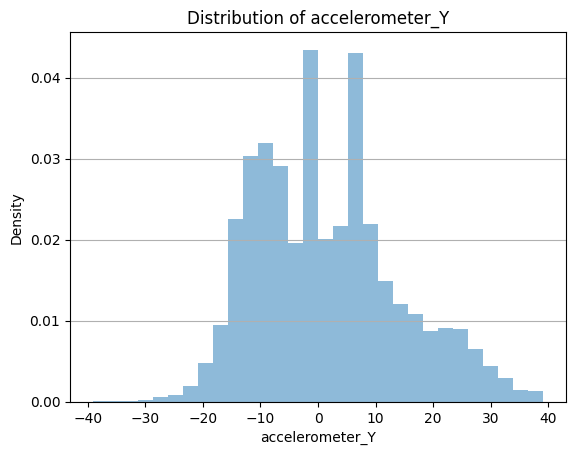

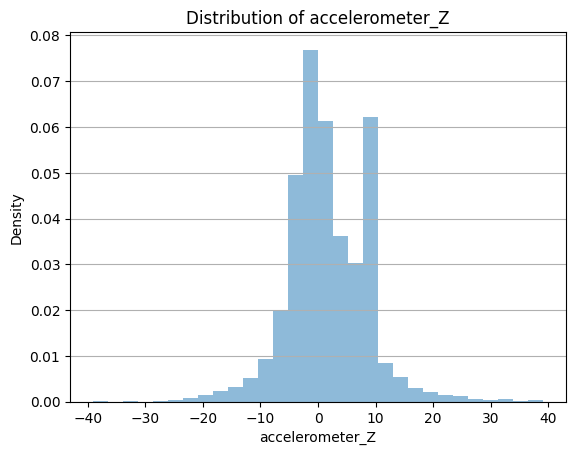

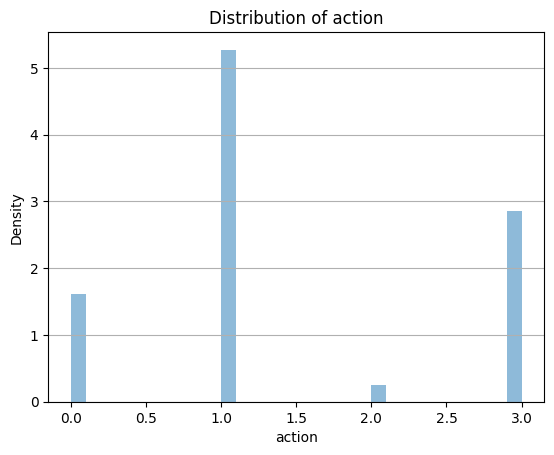

In [53]:
numerical_cols = df.select_dtypes(include=[np.number])

def plot_histograms(dataframe, numerical_columns):
    for col in numerical_columns:
        plt.figure()
        dataframe[col].plot(kind='hist', density=True, alpha=0.5, bins=30)
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.title(f'Distribution of {col}')
        plt.grid(axis='y')

plot_histograms(df, numerical_cols.columns)

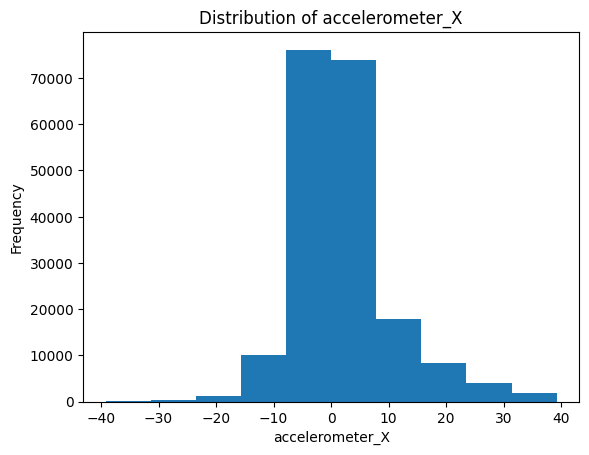

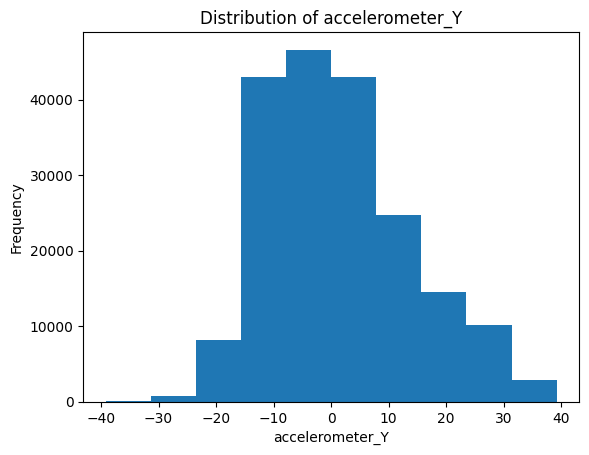

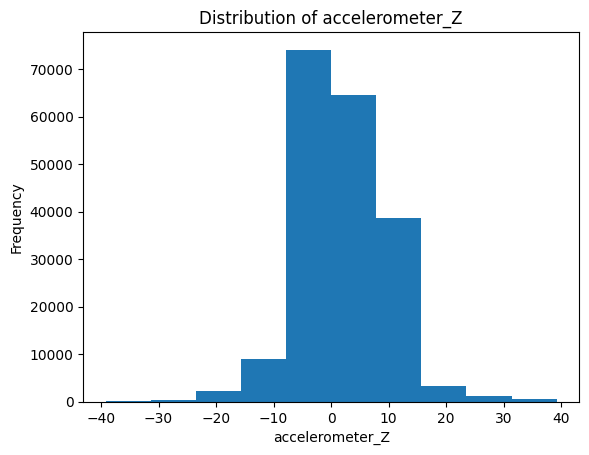

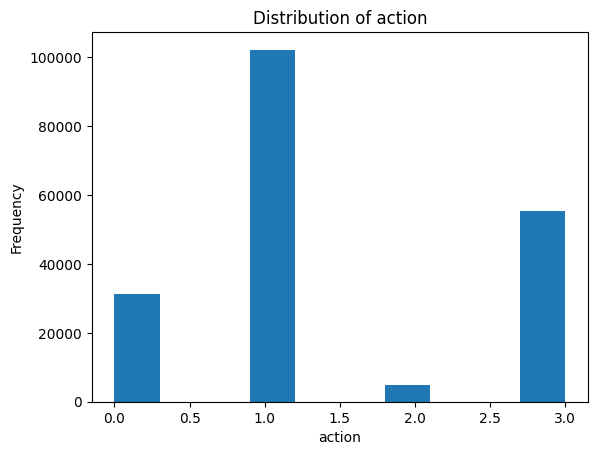

In [54]:
for col in numerical_cols:
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
  plt.show()

<Figure size 1000x600 with 0 Axes>

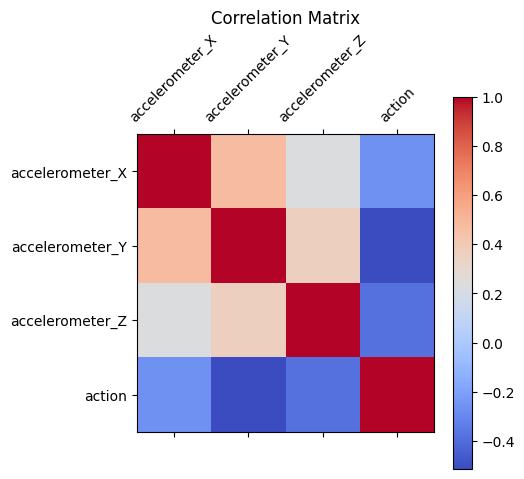

In [56]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

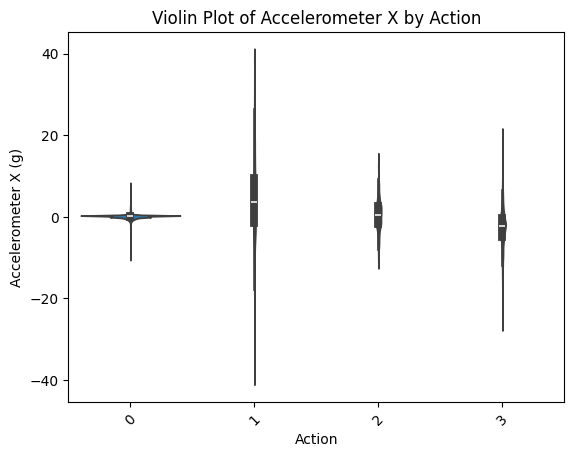

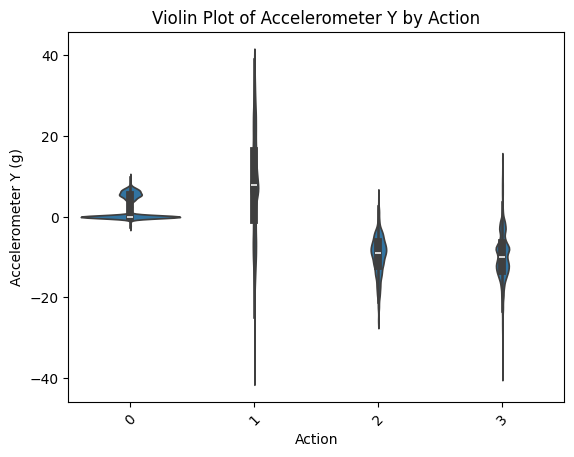

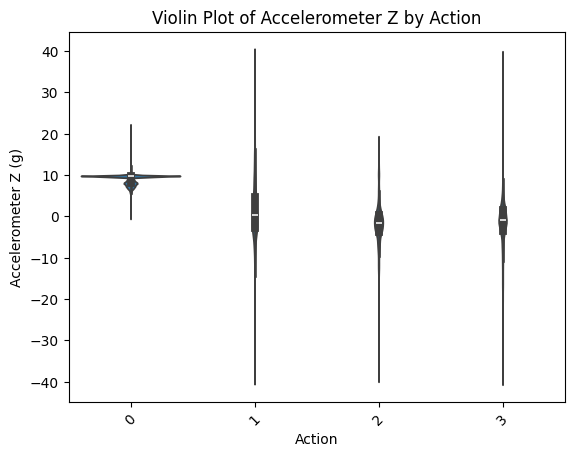

<Figure size 640x480 with 0 Axes>

In [57]:
for axis in ['X', 'Y', 'Z']:
  sns.violinplot(
      x = "action",
      y = f"accelerometer_{axis}",
      data=df
  )
  plt.xlabel("Action")
  plt.ylabel(f"Accelerometer {axis} (g)")
  plt.title(f"Violin Plot of Accelerometer {axis} by Action")
  plt.xticks(rotation=45)
  plt.show()
  plt.clf()

In [61]:
for col in df.select_dtypes(include=[object]):
  plt.figure()
  plt.bar(df[col].value_counts().index, df[col].value_counts().values)
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title(f'Distribution of target variable by {col}')
  plt.show()

In [60]:
X = df.drop('action', axis=1)
y = df['action']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
X_train['time_mean'] = X_train.mean(axis=1)
X_test['time_mean'] = X_test.mean(axis=1)

X_train['std'] = X_train.std(axis=1)
X_test['std'] = X_test.std(axis=1)
X_train['min'] = X_train.min(axis=1)
X_test['min'] = X_test.min(axis=1)
X_train['max'] = X_train.max(axis=1)
X_test['max'] = X_test.max(axis=1)
X_train['median'] = X_train.median(axis=1)
X_test['median'] = X_test.median(axis=1)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.88008438, -0.82179118, -0.38420223, ..., -0.56378755,
        -0.89344057, -1.07531526],
       [-0.34266888, -1.59094833, -0.35225199, ..., -2.00412468,
        -0.22362319, -0.47141173],
       [ 0.62627327, -2.14796373, -2.60008844, ..., -3.04720146,
         0.5102639 , -2.05538613],
       ...,
       [ 0.20897913, -0.82754547, -0.78557777, ..., -0.57456313,
        -0.63507907, -0.76874721],
       [-1.17042547, -1.11602732, -0.1106278 , ..., -1.11477928,
        -0.57645103, -1.28032523],
       [ 0.00574039, -0.64264082, -0.64845777, ..., -0.22830744,
        -0.85593079, -0.69038886]])

In [67]:
%%time
svm_model = SVC()
rf_model = RandomForestClassifier()
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

CPU times: user 11min 17s, sys: 2.41 s, total: 11min 20s
Wall time: 12min


RandomForestClassifier()

In [68]:
%%time
svm_pred = svm_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

CPU times: user 1min 41s, sys: 122 ms, total: 1min 41s
Wall time: 1min 42s


In [69]:
%%time
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_report = classification_report(y_test, svm_pred)

rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_report = classification_report(y_test, rf_pred)

print('======================== SVM ========================')
print(f'Accuracy  {svm_accuracy:.4f}')
print(f'Precision {svm_precision:.4f}')
print(f'Recall    {svm_recall:.4f}')
print(f'F1 Score  {svm_f1:.4f}')
print(svm_report)
print()
print('=================== Random Forest =================== ')
print(f'Accuracy  {rf_accuracy:.4f}')
print(f'Precision {rf_precision:.4f}')
print(f'Recall    {rf_recall:.4f}')
print(f'F1 Score  {rf_f1:.4f}')
print(rf_report)

======================== SVM ========================
Accuracy  0.8986
Precision 0.9046
Recall    0.8986
F1 Score  0.8873
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6209
           1       0.93      0.91      0.92     20371
           2       1.00      0.01      0.01      1060
           3       0.81      0.91      0.86     11132

    accuracy                           0.90     38772
   macro avg       0.93      0.70      0.69     38772
weighted avg       0.90      0.90      0.89     38772


=================== Random Forest =================== 
Accuracy  0.9997
Precision 0.9997
Recall    0.9997
F1 Score  0.9997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6209
           1       1.00      1.00      1.00     20371
           2       1.00      0.99      1.00      1060
           3       1.00      1.00      1.00     11132

    accuracy                           1.00    

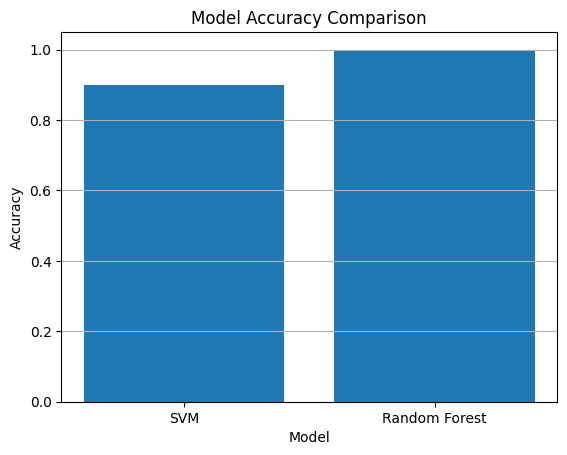

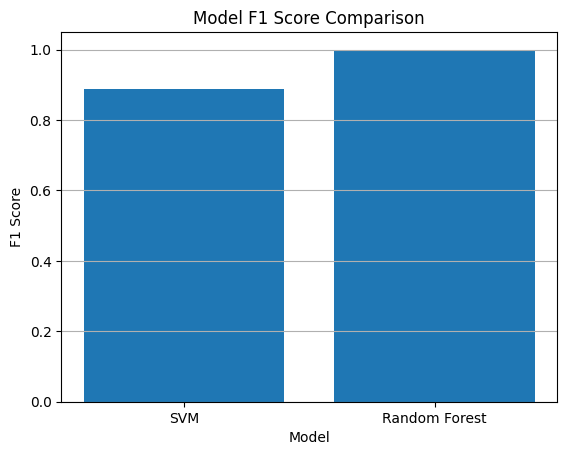

In [70]:
plt.figure()
plt.bar(['SVM', 'Random Forest'], [svm_accuracy, rf_accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y')
plt.show()

plt.figure()
plt.bar(['SVM', 'Random Forest'], [svm_f1, rf_f1])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.grid(axis='y')
plt.show()

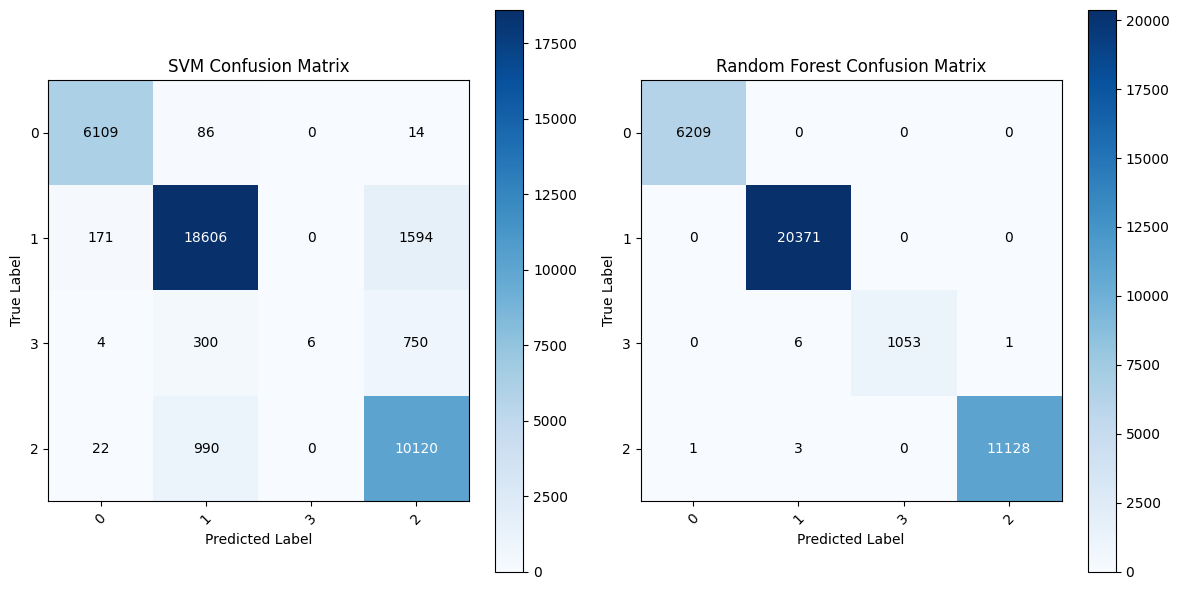

In [71]:
# Confusion matrix for SVM
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
class_names = list(df['action'].unique())
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)

plt.subplot(1, 2, 2)
plt.imshow(rf_cm, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')

thresh = rf_cm.max() / 2.0
for i in range(rf_cm.shape[0]):
    for j in range(rf_cm.shape[1]):
        plt.text(j, i, rf_cm[i, j],
                 ha="center", va="center",
                 color="white" if rf_cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()